In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import joblib
from shared import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
data = pd.read_csv('data/dataset.data', header=None)
parsed_data = data.apply(parse_line, axis=1)

X = parsed_data.iloc[:, :9]
Y = parsed_data.iloc[:, 9]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
y_pred = model.predict(X_test)

In [7]:
# board_df = pd.DataFrame([['1', '-1', '1', '1', '0', '0', '1', '1', '0']])

# y_prediction = model.predict(board_df)

# print(y_prediction)

In [8]:
# confusion_matrix(y_test, y_prediction)

In [9]:
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 0.812807881773399
Matriz de Confusão:
[[ 70   3  21   1]
 [  5 179   4   0]
 [ 24  10  81   3]
 [  2   0   3   0]]
Relatório de Classificação:
              precision    recall  f1-score   support

          -2       0.69      0.74      0.71        95
           2       0.93      0.95      0.94       188
           3       0.74      0.69      0.71       118
           4       0.00      0.00      0.00         5

    accuracy                           0.81       406
   macro avg       0.59      0.59      0.59       406
weighted avg       0.81      0.81      0.81       406



In [10]:
classes_unicas = Y.unique()
print(classes_unicas)

[ 3  2 -2  4]


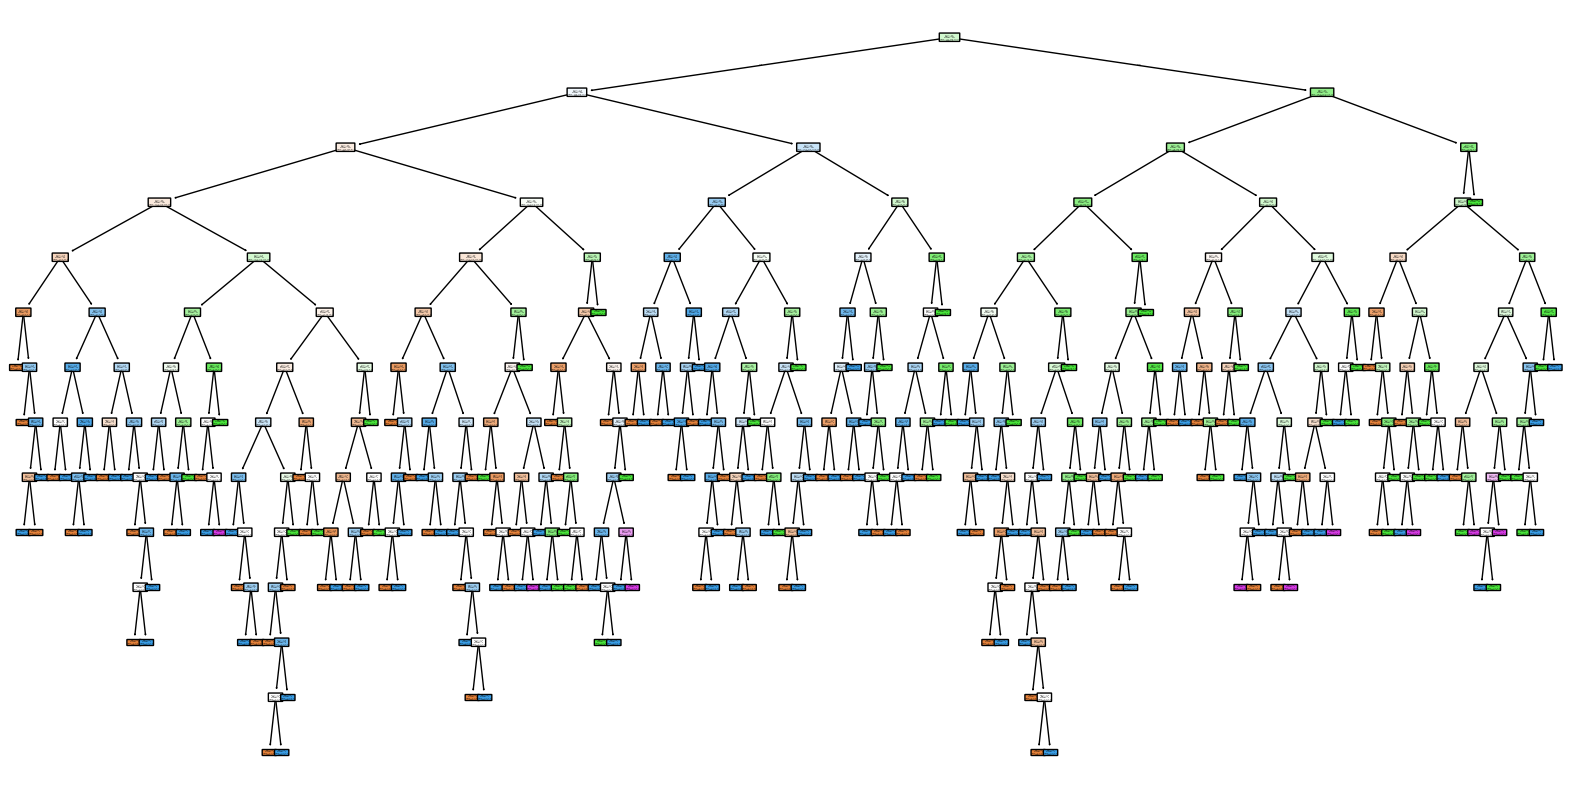

In [11]:
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, class_names=['2','-2','4','3'], rounded=True)
plt.show()

In [12]:
import pickle

with open('modelo_decision_tree.pkl', 'wb') as f:
    pickle.dump(model, f)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [14]:
print("Acurácia: ", accuracy)
print("Precisão: ", precision)
print("Recall: ", recall)
print("F-measure: ", f1)

Acurácia:  0.812807881773399
Precisão:  0.8098534258281886
Recall:  0.812807881773399
F-measure:  0.810798980481085
